In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from wordcloud import WordCloud

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7184\2774875263.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 0. 데이터 로드

* (학습, 검증): (51630, 6641)
* 사용자, 컴퓨터의 대화 6문장으로 구성
* 연령, 성별, 신체질환, 감정_대분류, 감정_소분류, 상황키워드 제공

In [2]:
TRAIN_DATA_PATH = "D:/dataset/018.감성대화/Training_221115_add/라벨링데이터"
VALID_DATA_PATH = "D:/dataset/018.감성대화/Validation_221115_add/라벨링데이터"
TRAIN_RAW_DATA_PATH = "D:/dataset/018.감성대화/Training_221115_add/원천데이터"
VALID_RAW_DATA_PATH = "D:/dataset/018.감성대화/Validation_221115_add/원천데이터"

In [3]:
# train_data load
train_df = pd.read_json(os.path.join(TRAIN_DATA_PATH, "감성대화말뭉치(최종데이터)_Training.json"))
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51628 entries, 0 to 51627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   profile  51628 non-null  object
 1   talk     51628 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [4]:
train_raw_df = pd.read_excel(os.path.join(TRAIN_RAW_DATA_PATH, "감성대화말뭉치(최종데이터)_Training.xlsx"))
train_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51630 entries, 0 to 51629
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51630 non-null  int64 
 1   연령          51630 non-null  object
 2   성별          51630 non-null  object
 3   상황키워드       51630 non-null  object
 4   신체질환        51630 non-null  object
 5   감정_대분류      51630 non-null  object
 6   감정_소분류      51630 non-null  object
 7   사람문장1       51630 non-null  object
 8   시스템문장1      51630 non-null  object
 9   사람문장2       51630 non-null  object
 10  시스템문장2      51630 non-null  object
 11  사람문장3       42695 non-null  object
 12  시스템문장3      42695 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.1+ MB


In [5]:
# valid_data load
valid_df = pd.read_json(os.path.join(VALID_DATA_PATH, "감성대화말뭉치(최종데이터)_Validation.json"))
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6640 entries, 0 to 6639
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   profile  6640 non-null   object
 1   talk     6640 non-null   object
dtypes: object(2)
memory usage: 155.6+ KB


In [6]:
valid_raw_df = pd.read_excel(os.path.join(VALID_RAW_DATA_PATH, "감성대화말뭉치(최종데이터)_Validation.xlsx"))
valid_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6641 non-null   int64 
 1   연령          6641 non-null   object
 2   성별          6641 non-null   object
 3   상황키워드       6641 non-null   object
 4   신체질환        6641 non-null   object
 5   감정_대분류      6641 non-null   object
 6   감정_소분류      6641 non-null   object
 7   사람문장1       6641 non-null   object
 8   시스템문장1      6641 non-null   object
 9   사람문장2       6641 non-null   object
 10  시스템문장2      6641 non-null   object
 11  사람문장3       4686 non-null   object
 12  시스템문장3      4686 non-null   object
dtypes: int64(1), object(12)
memory usage: 674.6+ KB


# 1. 연령대, 성별

### 연령대
* `노년`, `중년`, `청소년`, `청년`으로 구분
* `노년` > `중년` > `청소년` > `청년`

In [7]:
age_set = list(set(train_raw_df["연령"]))
print(age_set)

['청년', '노년', '중년', '청소년']


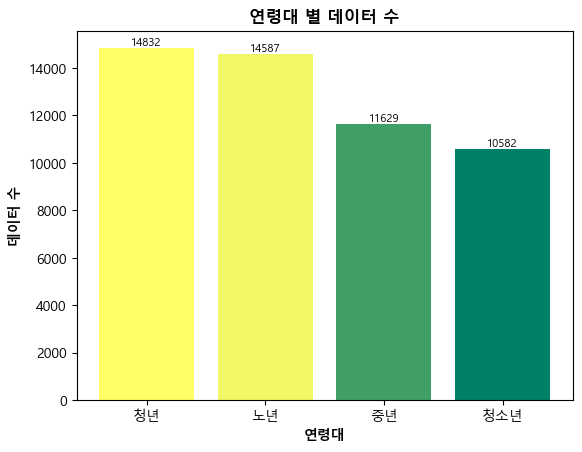

In [8]:
count_by_age = train_raw_df['연령'].value_counts()
norm = plt.Normalize(min(count_by_age), max(count_by_age))
colors = plt.cm.summer(norm(count_by_age))
bars = plt.bar(age_set, count_by_age, color=colors)
for bar, value in zip(bars, count_by_age):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(age_set)), age_set)
plt.title("연령대 별 데이터 수", fontweight='bold')
plt.xlabel("연령대", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')
plt.show()

### 성별

* `여성`, `남성`으로 구분
* `여성` > `남성`

In [9]:
gender_set = list(set(train_raw_df["성별"]))
print(gender_set)

['남성', '여성']


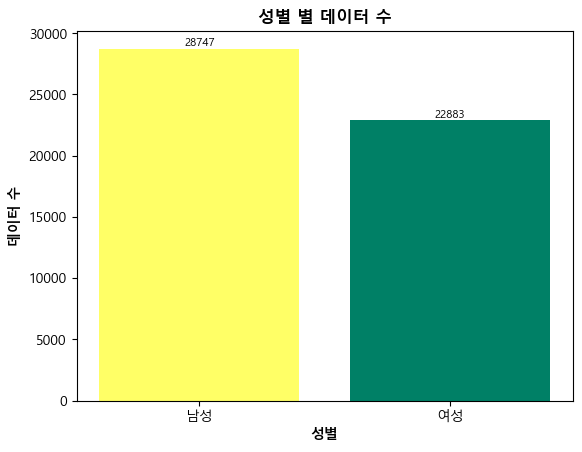

In [10]:
count_by_gender = train_raw_df['성별'].value_counts()
norm = plt.Normalize(min(count_by_gender), max(count_by_gender))
colors = plt.cm.summer(norm(count_by_gender))
bars = plt.bar(gender_set, count_by_gender, color=colors)
for bar, value in zip(bars, count_by_gender):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(gender_set)), gender_set)
plt.title("성별 별 데이터 수", fontweight='bold')
plt.xlabel("성별", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')
plt.show()

## 1-1. 연령대, 성별 별 데이터/문장 수

In [11]:
count_data_by_age_n_gender = train_raw_df.groupby(['연령', '성별']).size()
count_conversation_by_age_n_gender = train_raw_df.groupby(['연령', '성별'])[['사람문장1', '사람문장2', '사람문장3']].count().sum(axis=1)
age_n_gender_set = count_data_by_age_n_gender.keys()
age_n_gender_set = age_n_gender_set.map(lambda x: '_'.join(x))

Text(0, 0.5, '데이터 수')

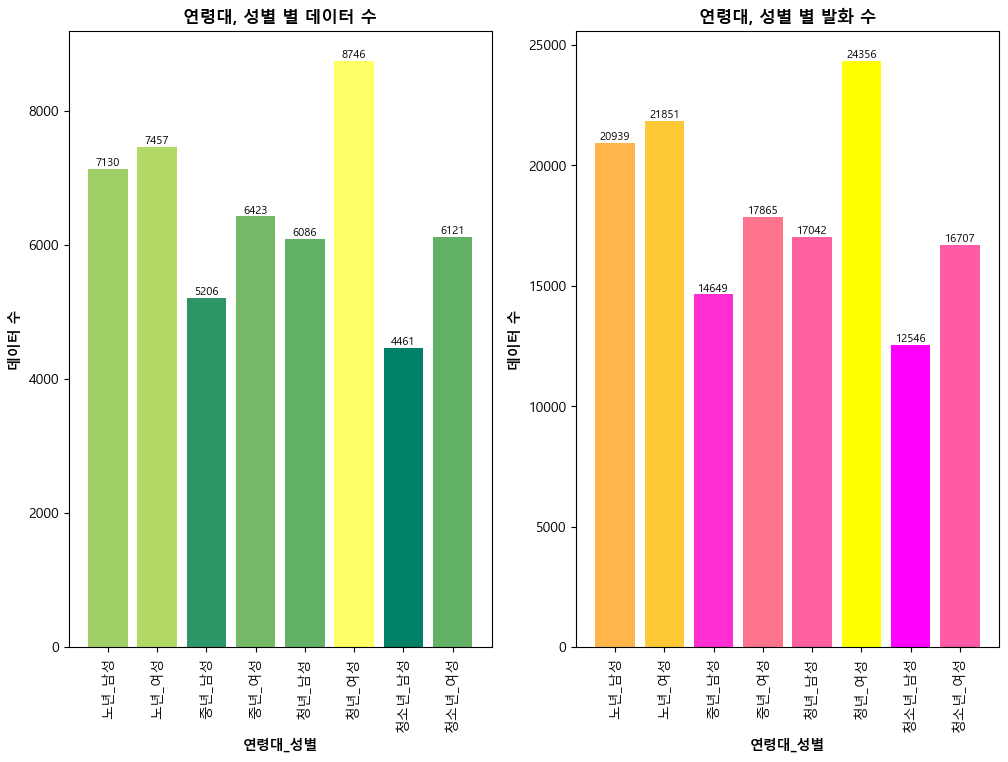

In [12]:
# 연령대, 성별 별 데이터 수
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
norm = plt.Normalize(min(count_data_by_age_n_gender), max(count_data_by_age_n_gender))
colors = plt.cm.summer(norm(count_data_by_age_n_gender))
bars = plt.bar(age_n_gender_set.map(lambda x: '_'.join(x)), count_data_by_age_n_gender, color=colors)
for bar, value in zip(bars, count_data_by_age_n_gender):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(age_n_gender_set)), age_n_gender_set, rotation='vertical')
plt.title("연령대, 성별 별 데이터 수", fontweight='bold')
plt.xlabel("연령대_성별", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')


# 연령대, 성별 별 발화 수
plt.subplot(1,2,2)
norm = plt.Normalize(min(count_conversation_by_age_n_gender), max(count_conversation_by_age_n_gender))
colors = plt.cm.spring(norm(count_conversation_by_age_n_gender))
bars = plt.bar(age_n_gender_set.map(lambda x: '_'.join(x)), count_conversation_by_age_n_gender, color=colors)
for bar, value in zip(bars, count_conversation_by_age_n_gender):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(age_n_gender_set)), age_n_gender_set, rotation='vertical')
plt.title("연령대, 성별 별 발화 수", fontweight='bold')
plt.xlabel("연령대_성별", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')

## 1-2. 연령대, 성별 별 상황키워드

In [13]:
import collections

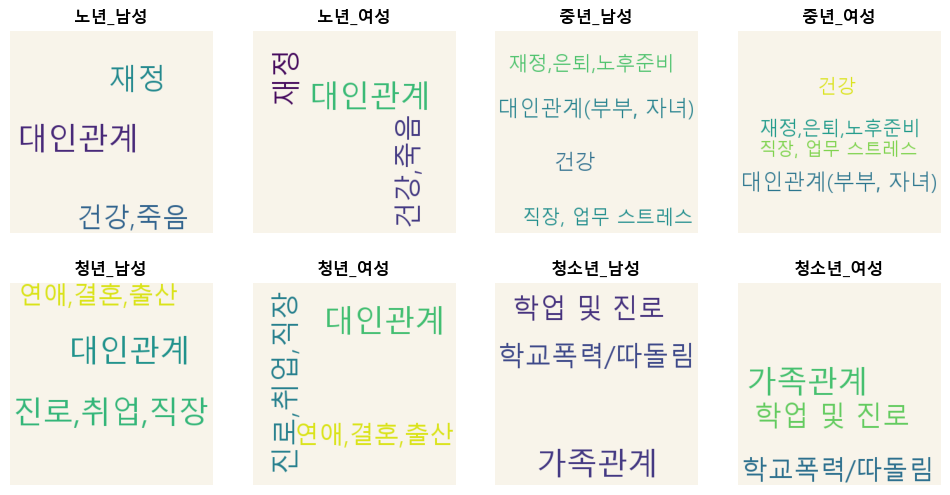

In [14]:
plt.figure(figsize=(12,6))
wc = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", background_color="#F8F4EA", max_font_size=48, width=320, height=320)
for i, age_n_gender in enumerate(age_n_gender_set):
    age, gender = age_n_gender.split("_")
    keywords = train_raw_df[(train_raw_df['연령']==age) & (train_raw_df['성별']==gender)]["상황키워드"]
    counter_dict = collections.Counter(keywords)

    cloud = wc.generate_from_frequencies(counter_dict)
    plt.subplot(2, 4, i+1)
    plt.axis("off")
    plt.title(age_n_gender, fontweight='bold')
    plt.imshow(cloud.to_image())    

# 2. 발화

* 총 145955 개의 발화
* `사람문장1`, `사람문장2만` 사용
    * 사람문장3은 결론인 경우가 많아서 뺌

In [15]:
sum = 0
sentences = ["사람문장1", "사람문장2", "사람문장3"]
for sentence in sentences:
    sum += (len(train_raw_df[sentence]) - train_raw_df[sentence].isna().sum())
print(sum)

145955


In [16]:
sampled_df = train_raw_df.sample(n=20)
sampled_df = sampled_df[["연령", "성별", "상황키워드", "감정_대분류", "사람문장1", "사람문장2", "사람문장3"]]
sampled_df.head(20)

,연령,성별,상황키워드,감정_대분류,사람문장1,사람문장2,사람문장3
41679,노년,여성,대인관계,불안,남동생이 한 명 있는데 만나기만 하면 싸워,부모님 재산을 제가 차지하고 나한데는 한푼 안 주니 그런 나쁜 사람이 어딨어.,부모님 병수발은 내가 다 했는데 살고 있는 주택을 몰래 팔아 아파트를 사서 지가 깔...
9926,중년,여성,건강,당황,이 나이에 임신이라니.,계획된 일이 아니라서 혼란스러워.,아직 얘기 못 했어. 나 자신도 혼란스러운데 남편도 당황할 거야.
11851,청년,남성,"연애,결혼,출산",슬픔,내가 청혼했는데 여자친구가 부정적인 반응을 보여서 매우 슬퍼.,일단 좀 더 기다려보고 결혼 이야기는 나중에 하려고.,NaN
13414,청소년,여성,가족관계,분노,학교에 늦어서 엄마 출근길에 나 좀 데려다 달라고 했는데 엄마가 화가 났을까?,늦어서 데려다 달라고 한 게 한두 번이 아니라 분명 화가 났을 거야.,엄마가 화내기 전에 고맙다고 애교 부려야겠어.
16684,노년,남성,"건강,죽음",분노,윗집이 얼른 이사해서 층간소음 없이 편하게 자고 싶어. 너무 힘들고 화가 나.,이사 갈 거라고 하긴 하는데 그때까지 소음을 참고 살아야 한다는 게 너무 힘들어.,경비실에는 자주 이야기해서 이제는 윗집에 직접 이야기해야 할 거 같아.
33538,중년,남성,건강,당황,건강을 챙기려고 운동도 하고 그것도 모자라서 건강 즙을 시켰는데 너무 깜짝 놀랐어.,건강 즙에서 이물질이 나왔어. 게다가 유통기한 표시도 제대로 되어 있지 않아서 너무...,그리고 제품 종류도 너무 많아서 고르기도 힘들어. 그래도 이번에는 대기업 제품이라 ...
22778,중년,남성,"대인관계(부부, 자녀)",당황,아내가 회사에 다니지 않으면서 가사도 돌보지 않아서 너무 괴로워.,내가 퇴근 후 가사 일까지 하려니 너무 힘들고 날 배려해 주지 않는 아내에게 속상해.,아내와 함께 이 문제에 대해서 진지하게 이야기를 나누어 볼까 봐.
15111,청년,남성,"연애,결혼,출산",분노,여자친구 카드로 생활하니까 자꾸 날 무시하는 것 같아서 화가 나.,몇 년간 빌붙은 것도 아닌데 요즘 들어 나한테 함부로 대해.,나가서 아르바이트라도 찾아봐야겠어.
48063,중년,남성,"대인관계(부부, 자녀)",분노,아내가 너무 갑작스럽게 죽어 황망해. 같이 사는 동안 아무것도 못 해줘서 너무 미안해.,바쁘단 핑계로 아내에게 너무 무심했어. 좀 더 표현하고 사랑해줬어야 했는데 후회돼.,앞으로 아이들에게 그리고 주변 사람들에게 더 신경 쓰려고 노력해야겠어.
49509,청소년,남성,가족관계,슬픔,내 앞가림은 내가 할 수 있는 나이인데 부모님이 사사건건 간섭하는 것 같아서 속상해.,특히 내가 사귀는 친구들에게 좋지 않은 편견을 가지신 것 같아서 정말 울고 싶어.,이렇게 우울한 기분만 가진 것보다는 부모님과 이야기를 다시 한번 해봐야겠어.


# 3. 감정대분류-감정소분류

* `긍정` : `부정` = 1:9
    * 긍정 데이터를 더 구해와야 할 것 같습니다.

In [17]:
count_data_by_emotion_type = train_raw_df.groupby(['감정_대분류', '감정_소분류']).size()
count_conversation_by_emotion_type = train_raw_df.groupby(['감정_대분류', '감정_소분류'])[['사람문장1', '사람문장2']].count().sum(axis=1)
emotion_type = count_data_by_emotion_type.keys()
emotion_big = set() 
emotion_small = dict()

for big, small in emotion_type:
    if big not in emotion_big:
        emotion_big.add(big)
        emotion_small[big] = [small]
        continue

    emotion_small[big].append(small)

print(f"<emotion 대분류>\n {emotion_big}")
print(f"<emotion 소분류>")
color_index_list = []
color_index = 0
for big in emotion_big:
    print(f"{big}: {emotion_small[big]}")
    for _ in range(len(emotion_small[big])):
        color_index_list.append(color_index)
    color_index += 30

emotion_type_set = emotion_type.map(lambda x: '_'.join(x))

<emotion 대분류>
 {'분노', '당황', '기쁨', '상처', '슬픔', '불안'}
<emotion 소분류>
분노: ['구역질 나는', '노여워하는', '방어적인', '분노', '성가신', '악의적인', '안달하는', '좌절한', '짜증내는', '툴툴대는']
당황: ['고립된', '남의 시선을 의식하는', '당황', '부끄러운', '열등감', '외로운', '죄책감의', '한심한', '혐오스러운', '혼란스러운']
기쁨: ['감사하는', '기쁨', '느긋', '만족스러운', '신뢰하는', '신이 난', '안도', '자신하는', '편안한', '흥분']
상처: ['가난한, 불우한', '고립된', '괴로워하는', '배신당한', '버려진', '상처', '억울한', '질투하는', '충격 받은', '희생된']
슬픔: ['낙담한', '눈물이 나는', '마비된', '비통한', '슬픔', '실망한', '염세적인', '우울한', '환멸을 느끼는', '후회되는']
불안: ['걱정스러운', '당혹스러운', '두려운', '불안', '스트레스 받는', '조심스러운', '초조한', '취약한', '혼란스러운', '회의적인']


Text(0, 0.5, '데이터 수')

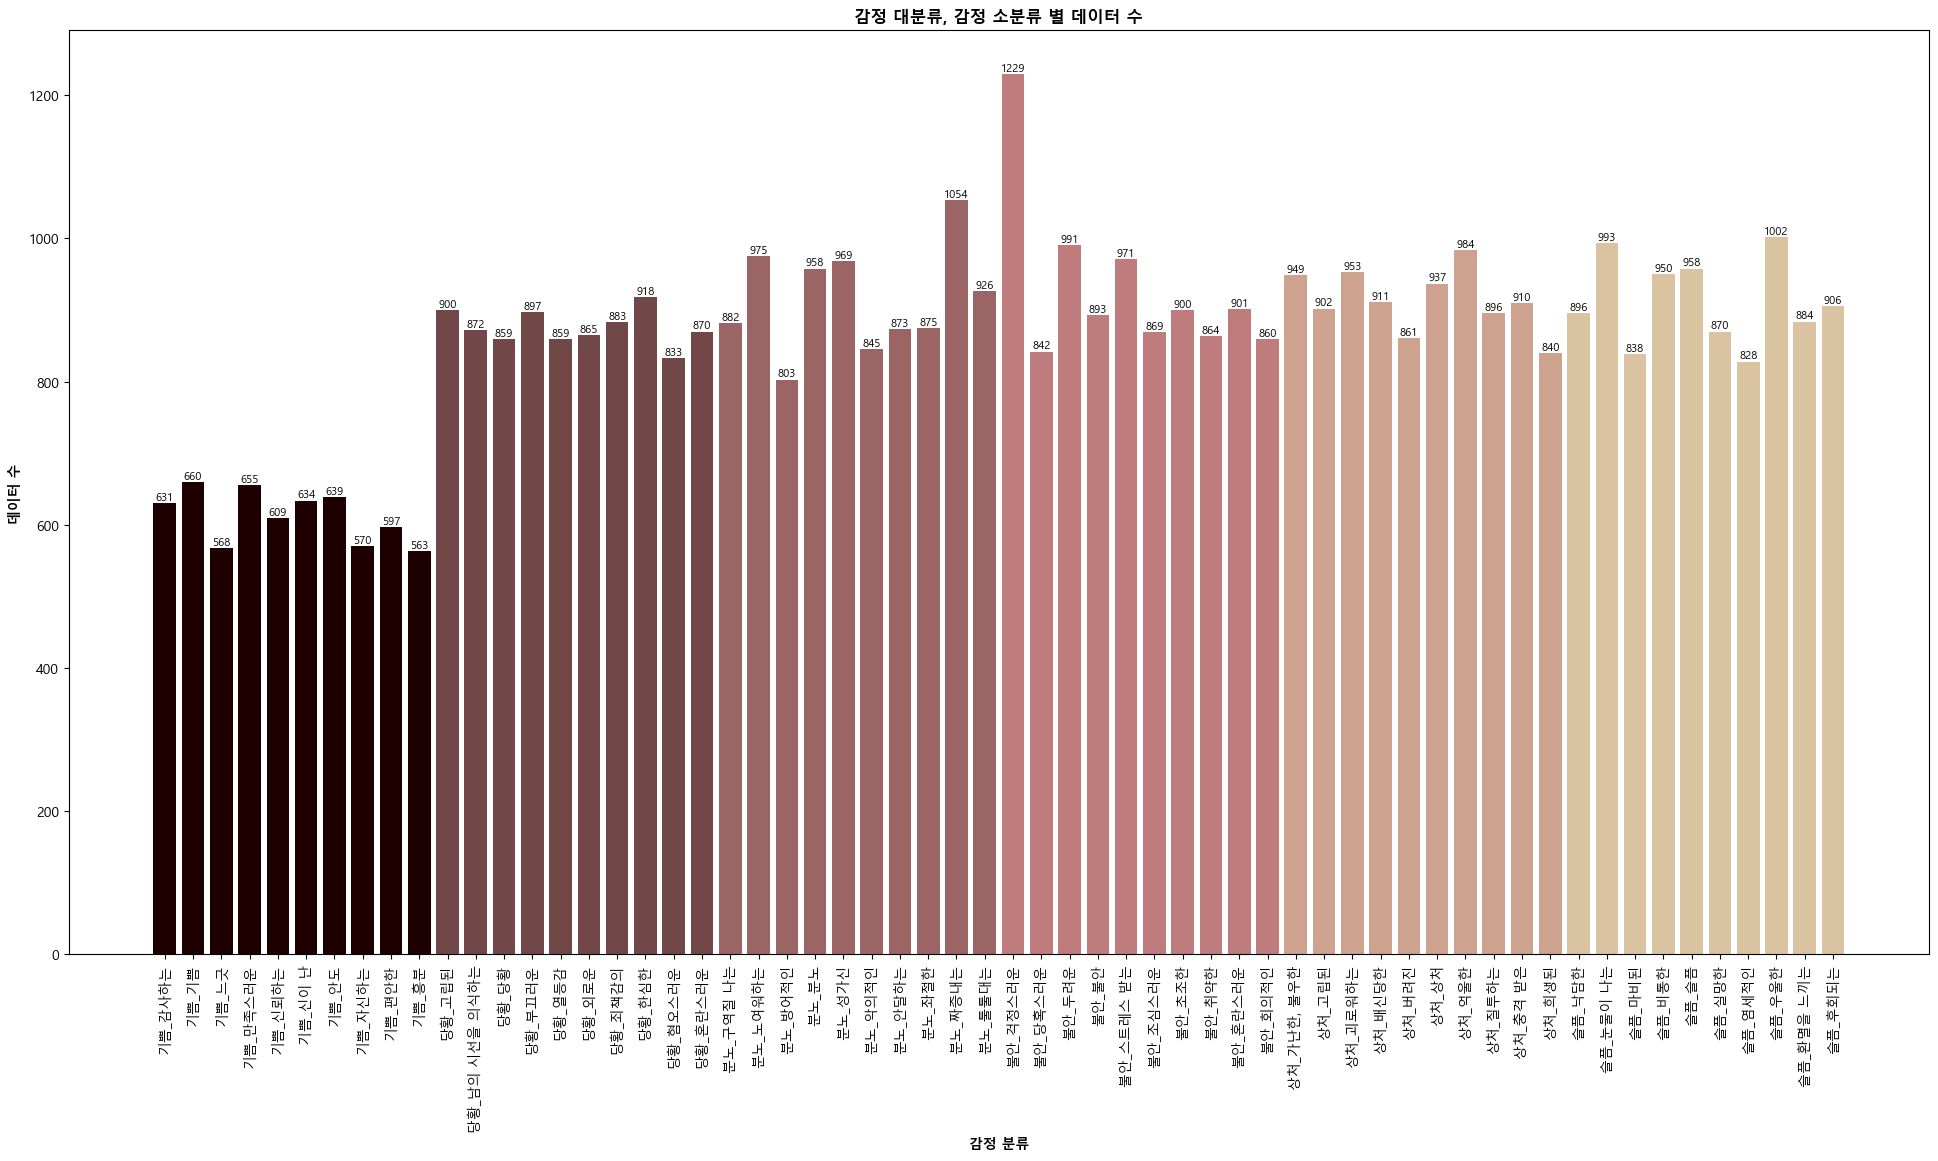

In [18]:
plt.figure(figsize=(24,12))
colors = plt.cm.pink(color_index_list)
bars = plt.bar(emotion_type_set, count_data_by_emotion_type, color=colors)
for bar, value in zip(bars, count_data_by_emotion_type):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(emotion_type_set)), emotion_type_set, rotation='vertical')
plt.title("감정 대분류, 감정 소분류 별 데이터 수", fontweight='bold')
plt.xlabel("감정 분류", fontweight='bold')
plt.ylabel("데이터 수", fontweight='bold')

Text(0, 0.5, '발화 수')

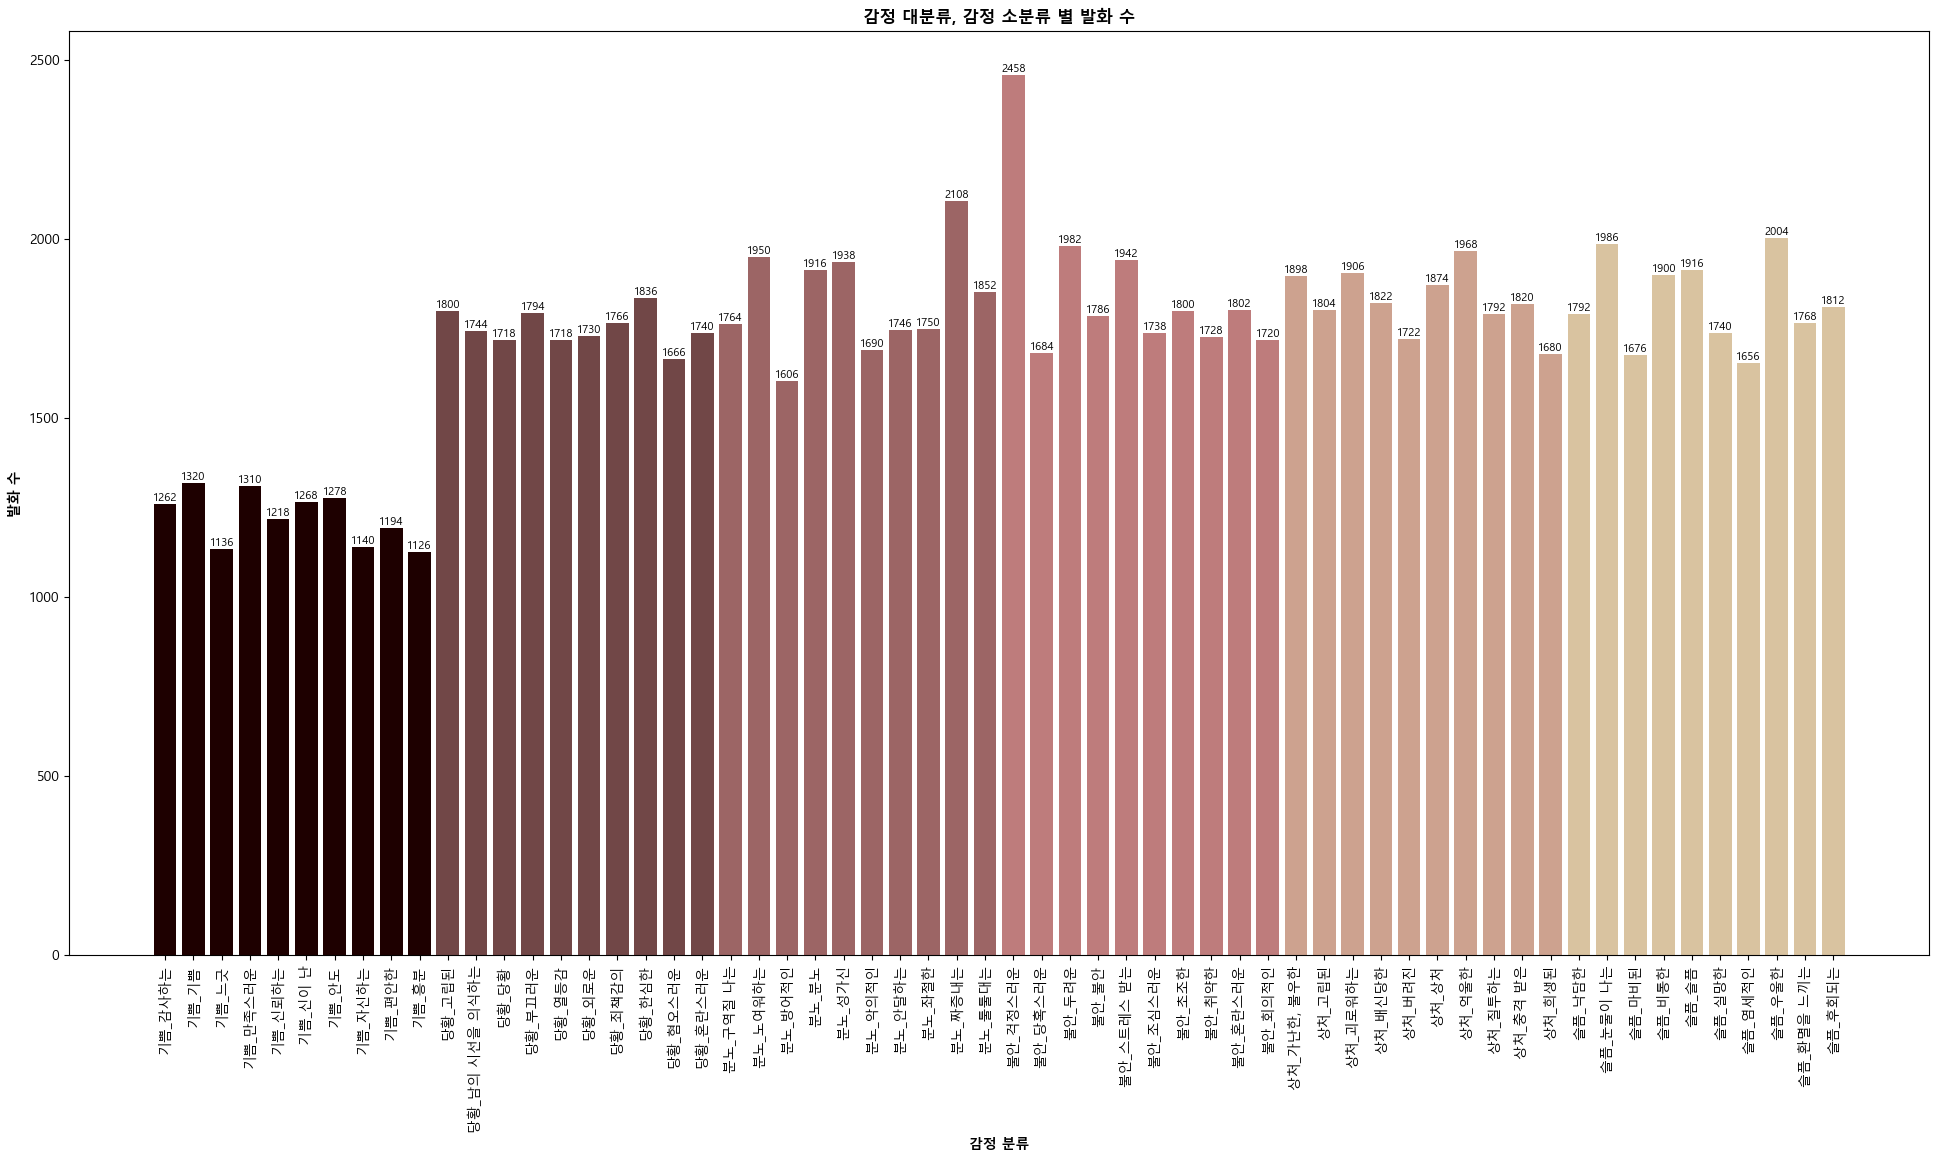

In [19]:
plt.figure(figsize=(24,12))
colors = plt.cm.pink(color_index_list)
bars = plt.bar(emotion_type_set, count_conversation_by_emotion_type, color=colors)
for bar, value in zip(bars, count_conversation_by_emotion_type):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom', fontsize=8)
plt.xticks(np.arange(len(emotion_type_set)), emotion_type_set, rotation='vertical')
plt.title("감정 대분류, 감정 소분류 별 발화 수", fontweight='bold')
plt.xlabel("감정 분류", fontweight='bold')
plt.ylabel("발화 수", fontweight='bold')

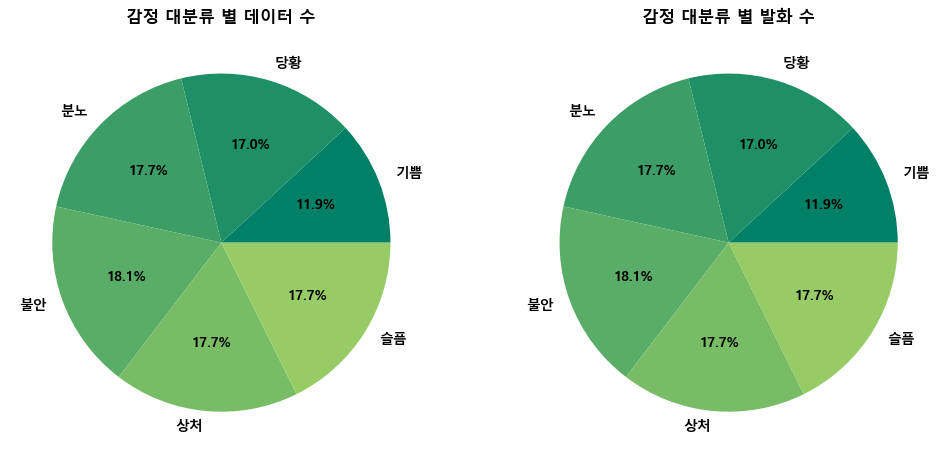

In [21]:
count_data_by_emotion_big_type = train_raw_df.groupby(['감정_대분류']).size()
count_conversation_by_emotion_big_type = train_raw_df.groupby(['감정_대분류'])[['사람문장1', '사람문장2']].count().sum(axis=1)
colors = plt.cm.summer([0, 30, 60, 90, 120, 150])

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(count_data_by_emotion_big_type, labels=count_data_by_emotion_big_type.keys(), colors=colors, autopct="%.1f%%", textprops={'color': 'black', 'weight': 'bold'})
plt.title("감정 대분류 별 데이터 수", fontweight='bold')

plt.subplot(1,2,2)
plt.pie(count_conversation_by_emotion_big_type, labels=count_conversation_by_emotion_big_type.keys(), colors=colors, autopct="%.1f%%", textprops={'color': 'black', 'weight': 'bold'})
plt.title("감정 대분류 별 발화 수", fontweight='bold')
plt.show()

# 4. 노년 데이터를 넣을까요?

네

In [23]:
elder_df = train_raw_df[train_raw_df["연령"]=="노년"]
elder_sampled_df = elder_df[["연령", "성별", "상황키워드", "감정_대분류", "사람문장1", "사람문장2", "사람문장3"]]
elder_sampled_df.head(20)

,연령,성별,상황키워드,감정_대분류,사람문장1,사람문장2,사람문장3
313,노년,여성,재정,슬픔,그동안 담배를 너무 많이 피웠나 봐. 이제 와서 내가 모은 돈을 보니 너무 후회가 돼.,담배 살 돈을 아꼈다면 나는 지금 얼마를 더 모았을까? 그런 생각이 들어.,몸을 위해서라도 담배를 끊어야겠지?
314,노년,여성,재정,슬픔,요즘 몸이 많이 안 좋아서 후회돼. 관리를 했어야 했는데 살기 바빠서 병원에 늦게 ...,먹고살기 바빴어. 요즘 자꾸 체력이 떨어지는 게 느껴지는데 어떻게 하면 좋을까?,이전에는 운동을 했었지. 지금 나이라도 운동을 하면 건강을 되찾을 수 있을까?
315,노년,여성,재정,슬픔,나는 자식을 위해 청춘을 다 바쳤는데 자식들은 내가 늙고 아프니 나를 챙기지 않아서...,나는 자식들에게 다 해 줬다고 생각하는데 늙고 병든 내가 잘못이지.,요즘 유난히 부정적인 생각이 많이 들어. 긍정적인 생각을 하려고 노력해야지.
316,노년,여성,재정,슬픔,요양원을 알아보고 있는데 젊을 때 모은 돈이 없어 좋은 요양원은 들어갈 수가 없어서...,그래도 젊은 날 열심히 일했더라면 노후에 이렇게 내 자신이 초라하게 느껴지진 않았을...,내 예산을 생각해서 다시 알아봐야 할 것 같아.
317,노년,여성,"건강,죽음",슬픔,난 항상 현재가 아닌 미래를 보며 살아왔어. 너무 현재를 즐기며 살지 못한 것 같아...,이제 몸이 아파서 새롭게 할 수 있는 것들이 많이 없을 것 같아.,내가 즐길 수 있는 일들을 찾아봐야겠어!
318,노년,여성,"건강,죽음",슬픔,그동안 건강 못 챙기고 일만 했는데 이렇게 아픈 병에 걸리고 말아서 후회돼.,응. 정말 매일 일만 하고 스스로 돌볼 생각은 전혀 못 했던 것 같아.,나 자신이 누구보다 건강하다고 자만했던 것 같아. 늦었지만 열심히 치료받으려고 해.
319,노년,여성,재정,슬픔,그동안 너무 즐기면서 살아서 후회돼. 미래를 계획했어야 했는데 저축을 안 해서 돈이...,노후에 이렇게 힘들 줄 몰랐어. 아프지 않았더라면 일이라도 할텐데,주변에 도움을 받았지. 그땐 도와주는 사람들이 많았거든.
320,노년,여성,"건강,죽음",슬픔,정말 난 꿈에도 생각하지 못했어. 건강에는 누구보다 자신 있었는데 내가 이렇게 아플...,젊은 날 더 열심히 건강 좀 챙기면서 살 걸 후회돼.,일단 스트레스 없이 잘 지내는 게 최선이지 싶어.
321,노년,여성,"건강,죽음",슬픔,어릴 때는 몰랐는데 내가 늙고 아프니 이제서야 부모님이 그때 왜 그렇게 말씀하셨는지...,그때 조금 더 귀 기울여 들어드릴 걸 그랬나 봐. 이제야 후회가 많이 남아.,부모님과 더 많은 대화를 하려고 노력하고 있어.
322,노년,여성,재정,슬픔,내가 조금만 더 건강을 챙겼으면 자식들이 나 때문에 병원비를 내지 않아도 됐을 텐데...,걔들도 상황이 넉넉하지 않을 텐데 내가 너무 부담을 주고 있는 것 같아.,자식들한테 부담되지는 않는지 물어보고 싶어.
